Similar Wine Search Engine
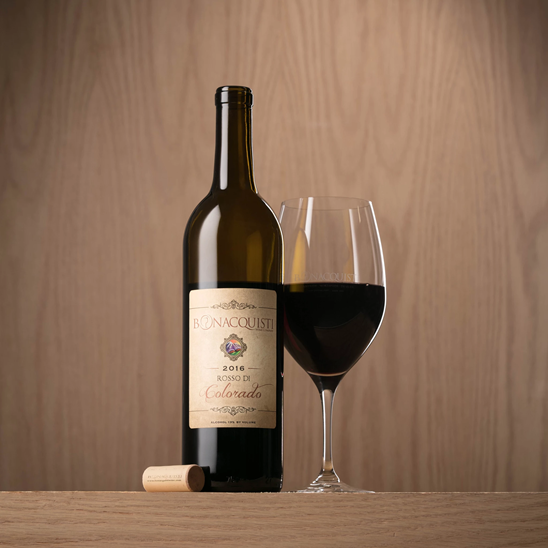



- LCBO website data scraping
<img src="LCBO example product.png" alt="Drawing" style="width: 500px;"/>


'LCBO_id', 'Price', 'Name', 'Description', 'Size', 
'Alcohol', 'Madein_city', 'Madein_country', 'Brand', 'Sugar',
'Sweetness', 'Style1', 'Style2', 'Variety', 'Featured_wines', 'Recomm_foods'

- Red wine category
- 5527 wine products
- Removed products with missing data
- 2890 products
- Final features used 

Numerical 
'Price', 'Sugar', 'Alcohol', 

Categorical
'Sweetness', 'Style1', 'Style2', 'Variety'



In [9]:
import pandas as pd
import numpy as np

Define functions

In [10]:
def gower_numer_dist(df, category, idx1, idx2):
# numerical distance (dissimilarity) 
# d_i_j_f = |x1 - x2|/(max(X)-min(X))
    # print(df[category][idx1], df[category][idx2])
    return np.abs(df[category][idx1] - df[category][idx2]) \
    /(df[category].max() - df[category].min())
    
def gower_qual_dist(df, category, idx1, idx2):
# qualitative distance (dissimilarity) - 1 if different; 0 if same
    # print(df[category][idx1], df[category][idx2])
    return int(df[category][idx1] != df[category][idx2])
    
def gower_dist(df, idx):
    # Gower distance
    # Source: https://towardsdatascience.com/clustering-on-mixed-type-data-8bbd0a2569c3
    # Source: https://stat.ethz.ch/education/semesters/ss2012/ams/slides/v4.2.pdf
    # Sample use
    # gower_dist(rw_df_mvp, [0, 1])
    [idx1, idx2] = idx
    categories = ['Price', 'Sugar', 'Alcohol', 'Sweetness', 'Style1', 'Style2', 'Variety']
    gower_dist_list = []
    for idx in range(3):
        gower_dist_list.append(gower_numer_dist(df, categories[idx], idx1, idx2))
        
    for idx in range(3,7):
        gower_dist_list.append(gower_qual_dist(df, categories[idx], idx1, idx2))
    # print(gower_dist_list)
    return sum(gower_dist_list)/len(gower_dist_list)

Load wine data

In [11]:
rw_df_mvp = pd.read_excel('rw_df_mvp.xlsx')
columns_to_show = ['Name', 'Price', 'Sugar', 'Alcohol', 'Sweetness', 'Style1', 'Style2', 'Variety']

Sample data

In [12]:
product_idx = 10
print(rw_df_mvp.loc[product_idx, columns_to_show])

Name         20 Bees Cabernet Merlot VQA
Price                              12.95
Sugar                                  9
Alcohol                             12.2
Sweetness                        D - Dry
Style1                            Fruity
Style2                     Medium-bodied
Variety                  Cabernet/Merlot
Name: 10, dtype: object


Insert the product number

In [13]:
product_idx = 5
print(rw_df_mvp.loc[product_idx, columns_to_show])

Name         14 Hands Winery Cabernet Sauvignon 2016
Price                                          17.95
Sugar                                             10
Alcohol                                         13.5
Sweetness                             XD - Extra Dry
Style1                                        Fruity
Style2                                 Medium-bodied
Variety                     Cabernet Sauvignon Blend
Name: 5, dtype: object


Recommendation generation
<img src="MVP Gower distance.png" alt="Drawing" style="width: 500px;"/>

In [14]:

for idx in range(len(rw_df_mvp)):
    if product_idx != idx:
        if not np.mod(idx, 200):
            print(str(int(idx/len(rw_df_mvp)*100)) + '%')
        elif idx+1 == len(rw_df_mvp):
            print('100%')
        columns = ('Num', 'Gower_dist')
        data = {}   

    data[columns[0]] = [idx]
    data[columns[1]] = [gower_dist(rw_df_mvp, (product_idx, idx))]

    if idx == 0:
        gower_dist_one = pd.DataFrame(data)
    else:
        gower_dist_one = pd.concat([gower_dist_one, pd.DataFrame(data)])       


gower_dist_one_sorted = gower_dist_one.sort_values(by=['Gower_dist'])
sorted_list_gower = gower_dist_one_sorted['Gower_dist'].to_numpy()

sorted_list_num = gower_dist_one_sorted['Num'].to_numpy()
recommedation_list = []

idx = 0
count = 0
while count < 3:
    # print('idx' + str(idx))
    if sorted_list_gower[idx] != 0:
        # print('count'+str(count))
        recommedation_list.append(sorted_list_num[idx])
        count = count + 1
    idx = idx + 1        

0%
6%
13%
20%
27%
34%
41%
48%
55%
62%
69%
76%
83%
89%
96%
100%


Display results and compare to the original product

In [15]:
print(rw_df_mvp.loc[product_idx, columns_to_show])
print(rw_df_mvp.loc[recommedation_list[0], columns_to_show])
print(rw_df_mvp.loc[recommedation_list[1], columns_to_show])
print(rw_df_mvp.loc[recommedation_list[2], columns_to_show])


Name         14 Hands Winery Cabernet Sauvignon 2016
Price                                          17.95
Sugar                                             10
Alcohol                                         13.5
Sweetness                             XD - Extra Dry
Style1                                        Fruity
Style2                                 Medium-bodied
Variety                     Cabernet Sauvignon Blend
Name: 5, dtype: object
Name         Sebastiani Lake County Sonoma County Cabernet ...
Price                                                    24.75
Sugar                                                        4
Alcohol                                                   13.5
Sweetness                                       XD - Extra Dry
Style1                                                  Fruity
Style2                                           Medium-bodied
Variety                               Cabernet Sauvignon Blend
Name: 2370, dtype: object
Name         Avalon Lod